In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv("/content/gender_submission.csv")
df.head()
df.dropna()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
X = df.drop(["Survived"],axis=1)
y = df["Survived"]
X.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [113]:
class Stochastic_gradient_decent:
  def __init__(self,alpha = 1e-4,random_seed = 42):
    self.random_seed = random_seed
    np.random.seed(self.random_seed)
    self.alpha = alpha

  def se(self,h ,y):
    loss = (h-y)**2
    return loss


  def grad_cal(self,x , y,epochs):
    n_features = x.shape[1]
    theta0 = np.random.randn(n_features)
    theta1 = np.random.uniform(-0.1,0.1)
    weights = []
    bias = []
    loss_ = []
    for ep in range(epochs):
      for i in range(len(x)):

        h = np.dot(x[i],theta0)+theta1

        loss = h - y[i]
        theta0 -= self.alpha*(loss *x[i])
        theta1 -= self.alpha*(loss)

      if ep%10==0:
        lo = sum(self.se(theta0*x[i] + theta1 , y[i])for i in range(len(x)))/len(x)
        loss_.append(lo)
        weights.append(theta0)
        bias.append(theta1)

    return weights,bias,loss_

  def forward(self,x,y):

    weights , bias , loss = self.grad_cal(x,y,200)
    return weights,bias,loss


In [90]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3 , random_state=1)

In [91]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

In [114]:
sgd = Stochastic_gradient_decent()
weights,bias,loss = sgd.forward(X_train_np,y_train_np)

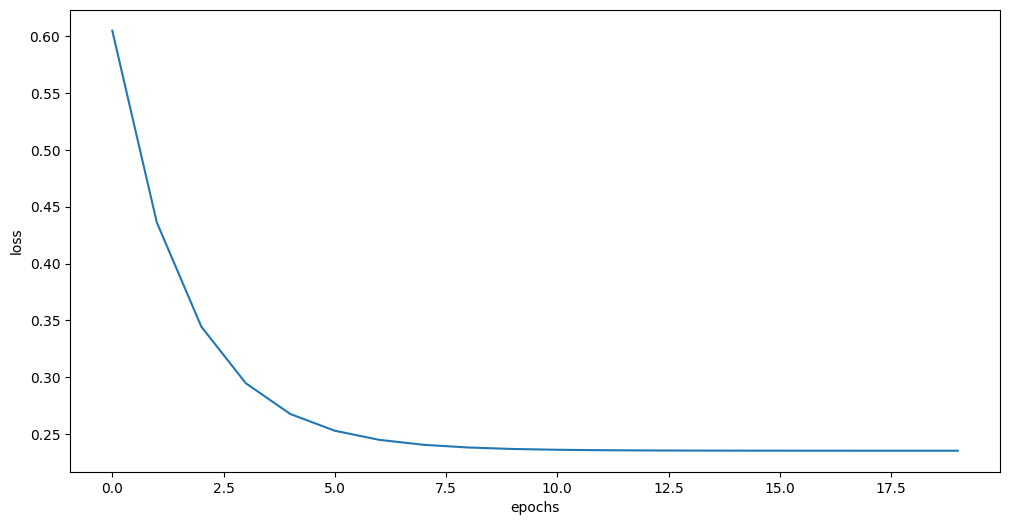

In [115]:
plt.figure(figsize=(12,6))
plt.plot( loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

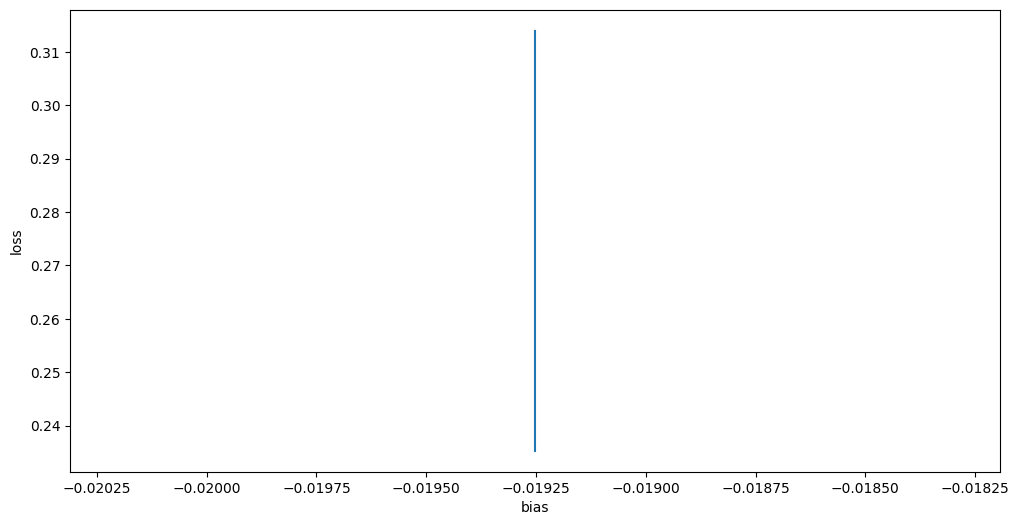

In [112]:
plt.figure(figsize=(12,6))
plt.plot(weights,loss)
plt.xlabel("bias")
plt.ylabel("loss")
plt.show()